# Index Code
    This file was created while learning Data Science. 
    It consists of mixed code snippets which I thought were useful and helped me for referencing while learning and creating projects. 
    * For reference purpose only. File not to be executed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # uNDERSTAND THIS

In [ ]:
# To display all the columns of a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# To view json data in table format (Creates a dataframe)
# pd.json_normalize(data['data']).head()

In [ ]:
# One line for statement
# print([i.lower() for i in 'TUR'])

# list1 = [ele for ele in list1 if ele not in unwanted_num]

# A = [1, 2, 3, 4]
# B = [sum(A[0:x+1]) for x in range(0, len(A))]
# print(B)

In [10]:
# Basic list ops
skills = ['a', 'c']
skills.insert(1, 'b')
skills.append('d')
print('-'.join(skills))

a-b-c-d


In [ ]:
# Getting unique values of all columns
# for i in data.columns:
#     print(i, ':', data[i].unique(), '\t Unique Values: ', data[i].nunique())

In [ ]:
# Getting value counts for all categories from all columns # Use vectorization 
# for i in data.columns:
#     print(data[i].value_counts())
#     print()

In [ ]:
# Countplot for all categories
# sns.countplot(data['class'])

In [9]:
# Basic lineplot
# avg_score = [] # Accuracy scores of diff. k values (KNN)
# plt.figure(figsize=(12, 8))
# plt.plot(range(2, 30), avg_score)
# plt.xlabel('n_neighbours')
# plt.ylabel('Accuracy')

In [ ]:
# Get count of values in a list on condition
# res.count(0)
# res.count(1)

# counter_i = 0
# for i in res:
#     if res[i] == 0:
#         counter_i += 1
# print('counter: ', counter_i)

In [ ]:
# To get parameters of an estimator object
# selection.estimator_params
# selection.estimators_

### Flight Price Prediction

In [11]:
# Dataframe
train_data = pd.read_excel('flight_train.xlsx')

In [12]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
# For loop to get number of unique values in all columns
for col in train_data.columns:
	print(col, ': ', len(train_data[col].unique()), ' labels')

Airline :  12  labels
Date_of_Journey :  44  labels
Source :  5  labels
Destination :  6  labels
Route :  129  labels
Dep_Time :  222  labels
Arrival_Time :  1343  labels
Duration :  368  labels
Total_Stops :  6  labels
Additional_Info :  10  labels
Price :  1870  labels


In [14]:
# Using pd.to_datetime
# Creates a column for hours and minutes from a column object of type date

# Extracting Hours
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

# Extracting Minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

# Extracting Day 
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day

# Extracting Month
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [15]:
# When using [['']], it appends the quoted string in column name with '_'
Airline = train_data[['Airline']]

In [16]:
# Good example of using .split and .strip for string operations
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   # Check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'   # Adds 0 minute
        else:
            duration[i] = '0h ' + duration[i]   # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))   # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  # Extracts only minutes from duration

In [17]:
# Adding Duration_Hours and Duration_Mins columns to train_data dataframe
train_data['Duration_Hours'] = duration_hours
train_data['Duration_Mins'] = duration_mins
train_data.drop(['Duration'], axis = 1, inplace = True)

In [18]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Journey_day,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,22,20,3,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,5,50,5,7,25


In [17]:
# Map (takes fn, iter obj as param)
mapper_test = list(map(lambda x: x*2, range(0, 6)))
print(mapper_test)

[0, 2, 4, 6, 8, 10]


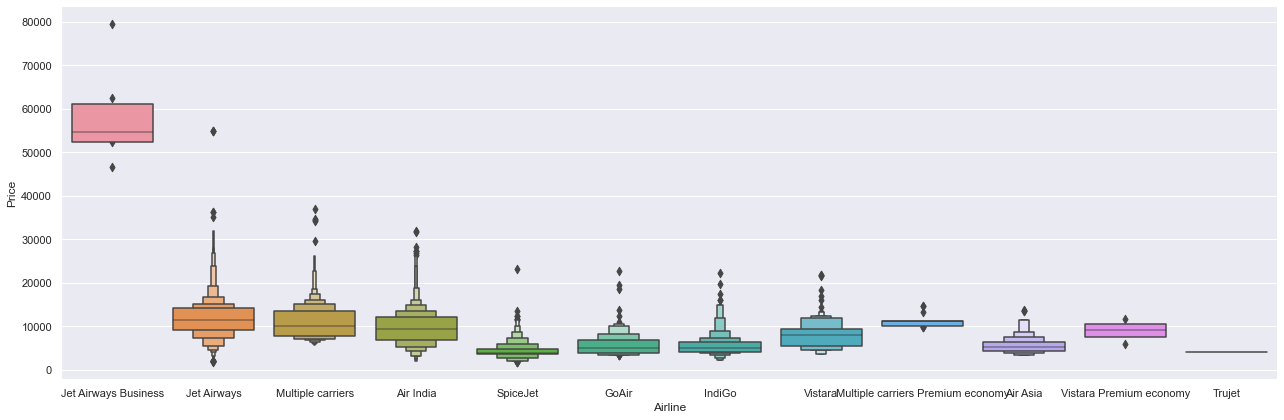

In [19]:
# Plotting graph Airline VS Price
sns.catplot(y = 'Price', x = 'Airline', data = train_data.sort_values('Price', ascending = False), kind='boxen', height = 6, aspect = 3)
plt.show()

In [ ]:
# Create new column by removing str from other column
# df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
# Extracting int from string 
# index = 0
# for row in df['size'][index].split():

#    if row.isdigit():

#       df.iloc[[index], [1]] = int(row)
#       index += 1

In [ ]:
# Stats of all columns
# data.describe()

In [ ]:
# Removing special characters from a column

# def remove_sign(x, sign):
#     if type(x) is str:
#         x = float(x.replace(sign,'').replace(',',''))
#     return x

# df.price = df.price.apply(remove_sign, sign='$')

In [ ]:
# Remove space in new line (Use: sep='')
# print('Lower bound \n', lower_bound, sep='')

### Cancer Dataset

In [20]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [21]:
cancer_df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [22]:
cancer_df['target'] = data.target

In [23]:
# T is for transpose
cancer_df.tail(2).T

,567,568
mean radius,20.600000,7.760000
mean texture,29.330000,24.540000
mean perimeter,140.100000,47.920000
mean area,1265.000000,181.000000
mean smoothness,0.117800,0.052630
mean compactness,0.277000,0.043620
mean concavity,0.351400,0.000000
mean concave points,0.152000,0.000000
mean symmetry,0.239700,0.158700
mean fractal dimension,0.070160,0.058840


<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

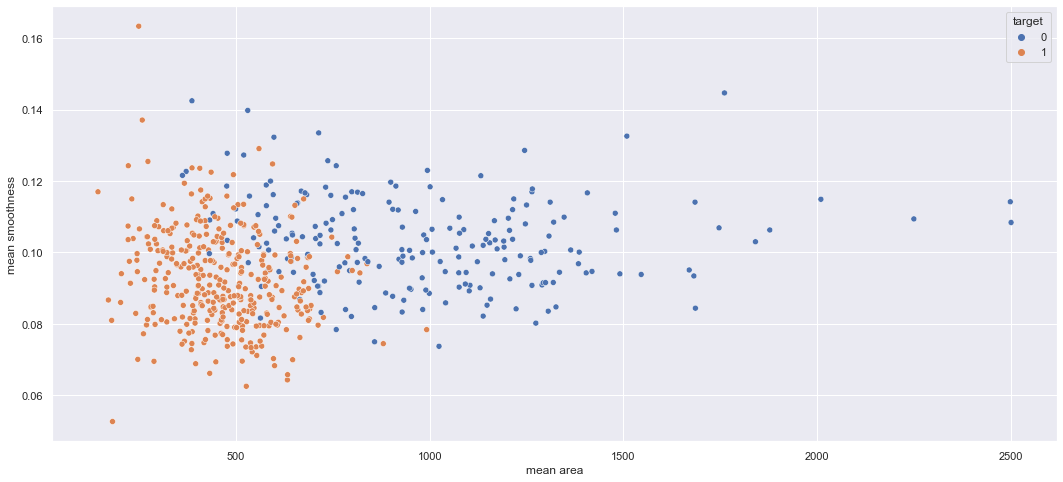

In [41]:
# Basic scatterplot (Good for classifiaction)
plt.figure(figsize=(18, 8))
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=cancer_df)

In [ ]:
# Plotting the scatterplot for outliers
sns.relplot(data=food, x='mean', y='latitude')

# Defining the size of the figure
sns.set(rc={'figure.figsize':(30,15)})

# Labeling
plt.title(f'MEAN PRODUCTION PER LATITUDE', fontsize=16) #plot TITLE
plt.xlabel('Mean production [1000 tons]', fontsize=14) #x-axis label
plt.ylabel('Latitude', fontsize=14) #y-axis label

# Showing grid for better visualization
sns.set_style('ticks',{'axes.grid' : True})

In [ ]:
# Boxplot with mean separator for categories
sns.boxplot(data=phase, x='month', y='time')

# Labeling
plt.title(f'BOXPLOT', fontsize=16) #plot TITLE
plt.xlabel('MONTH', fontsize=14) #x-axis label
plt.ylabel('CYCLE TIME[m]', fontsize=14) #y-axis label

# Adding an horizotal line to the mean cycle time
plt.axhline(mean, color='red') 
red_line = mpatches.Patch(color='red',
label=f'mean value: {mean:.1f} [m]')

# Handling the legend
plt.legend(handles=[red_line],prop={'size':12})

In [ ]:
# Cardinality reduction, reduces features based on a threshold value (Alternate to PCA)

from collections import Counter

def cumulatively_categorise(column, threshold=0.75, return_categories_list=True):
  # Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  # Initialise an empty list for our new minimised categories
  categories_list=[]
  # Initialise a variable to calculate the sum of frequencies
  s=0
  # Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  # Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    # Add the frequency to the global sum
    s+=dict(counts)[i]
    # Append the category name to the list
    categories_list.append(i)
    # Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  # Append the category Other to the list
  categories_list.append('Other')

  # Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  # Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  # Return only the transformed column if return_categories=False
  else:
    return new_column


# Call the function with a default threshold of 75%
transformed_column, new_category_list = cumulatively_categorise(data['Qualification'],return_categories_list=True)

In [ ]:
# Different techniques for iterating over the dataframe rows and columns
import datetime
# import numpy as np
# import pandas as pd
from pprint import pprint
 
ROWS = 50000
 
#=======================================
 
my_data = list(range(1, ROWS + 1))
my_data_df = pd.DataFrame({'my_col' : my_data})
 
calcs =  {
    'bare bones': lambda li, df: [i * 2 + 1 for i in li],
    'vectorized': lambda li, df: df['my_col'] * 2 + 1,
    'apply': lambda li, df: df['my_col'].apply(lambda x: x * 2 + 1),
    'iterrows': lambda li, df: [row['my_col'] * 2 + 1 for index, row in df.iterrows()],
    'itertuples': lambda li, df: [i.my_col * 2 + 1 for i in df.itertuples()],
    'to_records': lambda li, df: [i['my_col'] * 2 + 1 for i in df.to_records()],
    'to_numpy (vectorized)': lambda li, df: df.to_numpy()[:, 0] + 1,
    'to_numpy (iterative)': lambda li, df: [i[0] for i in df.to_numpy()],
    'to_dict': lambda li, df : [i * 2 + 1 for i in df.to_dict()['my_col']],
    'iloc loop': lambda li, df: [df.iloc[i, 0] for i in range(len(my_data_df))]
}
 
diagnostics = {}
 
for test, func in calcs.items():
    start_time = datetime.datetime.now()
    calc = func(li=my_data, df=my_data_df)
    end_time = datetime.datetime.now()
    diagnostics[test] = (end_time - start_time).microseconds
 
pprint(diagnostics)

# O/P (Total time taken)
# >>> pprint(diagnostics)
# {'apply': 33554,
#  'bare bones': 11996,
#  'iloc loop': 811999,
#  'iterrows': 689649,
#  'itertuples': 83192,
#  'to_dict': 37311,
#  'to_numpy (iterative)': 22984,
#  'to_numpy (vectorized)': 4164,
#  'to_records': 343681,
#  'vectorized': 9842}

### IPL Dataset

In [42]:
data = pd.read_csv('ipl_train.csv')

In [43]:
# Get unique values
data['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [44]:
# To check how many columns have NaN values
data.isna().any()
data.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1            False
umpire2            False
umpire3             True
dtype: bool

In [47]:
# Gives count of NaN values in each column
print(data.isna().sum())
print(data.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64


In [54]:
# Gets all columns for a single row in vertical orientation for minimum value (Important)
data.iloc[data['win_by_runs'].idxmin()]

# Gets all columns for a single row in vertical orientation for maximum value (Important)
data.iloc[data['win_by_wickets'].idxmax()]

id                                         13
season                                   2008
city                                   Mumbai
date                               2008-04-27
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
result                                 normal
dl_applied                                  0
winner                        Deccan Chargers
win_by_runs                                 0
win_by_wickets                             10
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
umpire1                             Asad Rauf
umpire2                            SL Shastri
umpire3                                   NaN
Name: 12, dtype: object

c:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

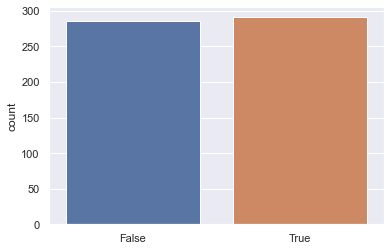

In [55]:
# Probability between binary result of two columns
prob_of_win = data['toss_winner'] == data['winner']
prob_of_win.groupby(prob_of_win).size()

sns.countplot(prob_of_win)

In [58]:
# Getting count of winners for each season using group by
data.groupby('season').winner.value_counts()

# Alternate method for getting count of one category using group by
# ssd = data.groupby(['winner'])
# ssd.get_group('Mumbai Indians')

season  winner                 
2008    Rajasthan Royals           13
        Kings XI Punjab            10
        Chennai Super Kings         9
        Delhi Daredevils            7
        Mumbai Indians              7
                                   ..
2016    Kolkata Knight Riders       8
        Delhi Daredevils            7
        Mumbai Indians              7
        Rising Pune Supergiants     5
        Kings XI Punjab             4
Name: winner, Length: 76, dtype: int64

In [60]:
# Another method for getting count of one category using group by
# data.loc[data.winner == 'Mumbai Indians'].groupby('season').winner.value_counts()
data.loc[data.player_of_match == 'A Mishra'].groupby(['season', 'city']).player_of_match.value_counts()

season  city          player_of_match
2008    Delhi         A Mishra           1
2009    Johannesburg  A Mishra           1
2011    Mumbai        A Mishra           2
2013    Delhi         A Mishra           1
        Hyderabad     A Mishra           2
        Pune          A Mishra           1
2016    Delhi         A Mishra           1
Name: player_of_match, dtype: int64

In [61]:
# Getting count of categories
data['winner'].value_counts()
# data['toss_decision'].value_counts()

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [62]:
# Getting count of specific categorie
len(data[data.winner == 'Mumbai Indians'])

# len(data.loc[data.winner == 'Mumbai Indians'])

80

In [65]:
# Filters columns on condition and returns a dataframe
data.filter(['season']).head()

,season
0,2008
1,2008
2,2008
3,2008
4,2008


Spippets *TITANIC

In [3]:
data = pd.read_csv('titanic_train.csv')

In [68]:
# Getting count of categories
genders = data.Sex.value_counts()
genders

male      577
female    314
Name: Sex, dtype: int64

In [365]:
# Alternate way of getting count of categories
data.loc[:, 'Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [4]:
# Using groupby
data.groupby('Embarked')['Sex'].value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

In [71]:
# Logic to get male and female survivors (getting count of categories in 2 dimensional level)
male_survived = 0
# for i in train.PassengerId: 109
for i in data.index:
    # i-=1 # Take index instead of subtracting from PassengerId
    if data.Survived[i] == 1 and data.Sex[i] == 'male':
        male_survived += 1

female_survived = 0
for i in data.PassengerId:
    i-=1
    if data.Survived[i]==1 and data.Sex[i]=='female':
        female_survived+=1

In [73]:
female_survived

233

In [74]:
# Creating a DF
gender_count = {'Gender': {'Male': male_survived, 'Female': female_survived}}
gender_survived = pd.DataFrame(data=gender_count)

In [75]:
gender_survived

,Gender
Female,233
Male,109


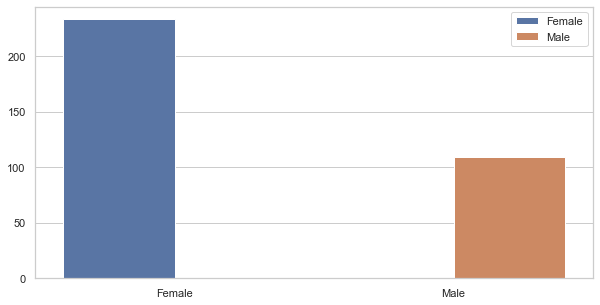

In [94]:
# Barplot for categories
# plt.figure(figsize=(10, 6))
# sns.barplot(x=genders.index, y=genders.values)

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.barplot(x=gender_survived.Gender.index, y=gender_survived.Gender.values, data=gender_survived, hue=gender_survived.Gender.index)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

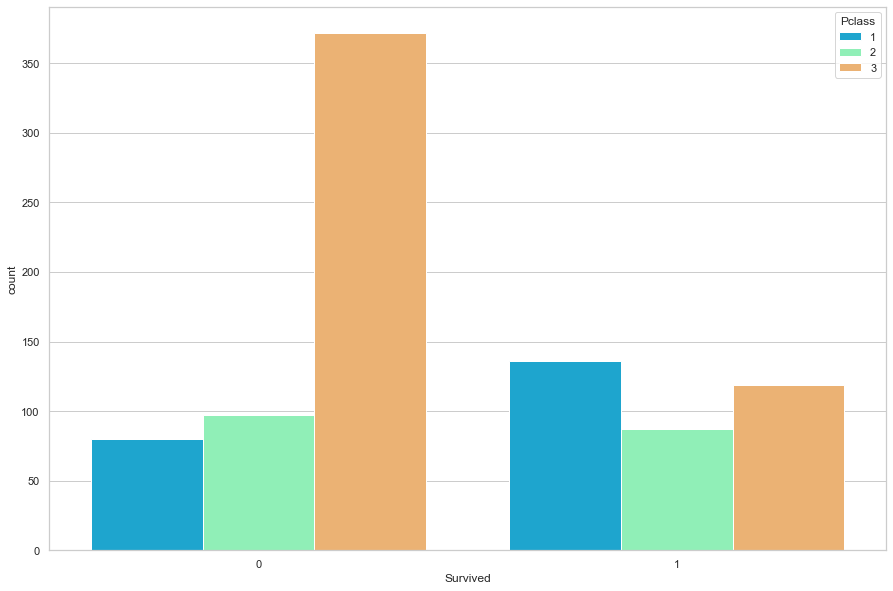

In [105]:
# Countplot (Categorical)
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data, palette='rainbow')
# sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')


In [ ]:
# Iplot (Unique)
import cufflinks as cf

In [106]:
cf.go_offline()
data['Fare'].iplot(kind='hist', bins=30, color='green')

<AxesSubplot:>

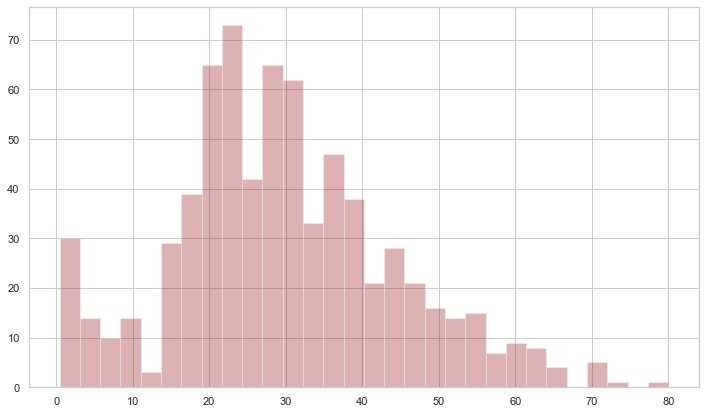

In [201]:
# Simple Histogram
plt.figure(figsize=(12, 7))
data['Age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

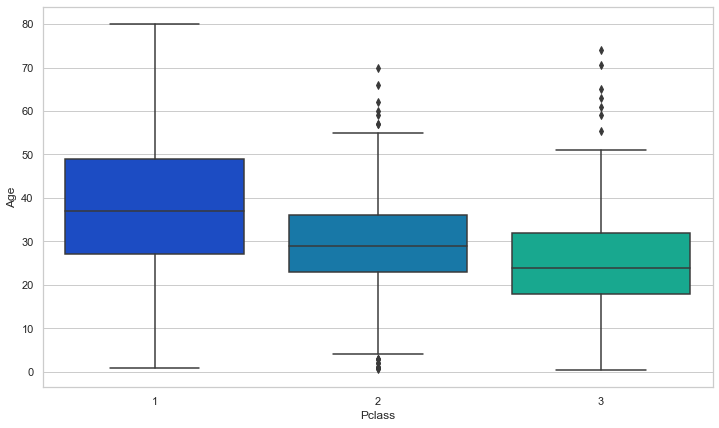

In [109]:
# Simple boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [112]:
# From category to numeric for single class (female)
data['isFemale'] = np.where(data['Sex'] == 'female', 1, 0)

In [6]:
# Dropping features not needed for model
titanic_df = data[[feat for feat in list(data) if feat not in ['Sex', 'Name', 'Ticket']]]

In [7]:
# Replacing NaN values
titanic_df['Embarked'] = titanic_df['Embarked'].replace(np.NaN, 'Unknown')

C:\Users\shaur\AppData\Local\Temp/ipykernel_1552/1518781673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Embarked'] = titanic_df['Embarked'].replace(np.NaN, 'Unknown')


In [123]:
# Gives a list of columns in dataset
list(data)

In [125]:
# To get only the passengers from cabin class 2 and 3
class_23 = data[data['Pclass'].isin([2, 3])]

In [129]:
class_23.Pclass.unique()

array([3, 2], dtype=int64)

In [130]:
# To get name of passengers aged above 35
adult_names = data.loc[data['Age'] > 35, 'Name']

In [134]:
adult_names[1:3]

6      McCarthy, Mr. Timothy J
11    Bonnell, Miss. Elizabeth
Name: Name, dtype: object

In [136]:
# Getting counts of categorical variable
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [246]:
# Alternate method of getting count of categorical variable
(data['Embarked'] == 'C').sum()

168

In [364]:
# Alternate method of getting count of categorical variable
len(data.loc[data['Embarked'] == 'C'])

168

In [330]:
# Using loc with condition
data.loc[data.Age == data.Age.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,"(14.454, 31.0]"


In [329]:
# Using loc for getting a dataframe on multiple conditions
data.loc[data.Pclass == 3].loc[data.Survived == 1].loc[data.Sex == 'male'].shape

(47, 13)

In [346]:
data.loc[data.Pclass == 1].loc[data.Sex == 'male'].loc[data.Fare == data.Fare.min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,"(-0.001, 7.91]"
633,634,0,1,"Parr, Mr. William Henry Marsh",male,37.0,0,0,112052,0.0,NaN,S,"(-0.001, 7.91]"
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,"(-0.001, 7.91]"
815,816,0,1,"Fry, Mr. Richard",male,37.0,0,0,112058,0.0,B102,S,"(-0.001, 7.91]"
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,"(-0.001, 7.91]"


In [356]:
# Alternate method for multiple conditions (Works only for a specific row data)
data.loc[(data['PassengerId'] == 264) & (data['Cabin'] == 'B94') & (data['Embarked'] == 'S')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,"(-0.001, 7.91]"


In [360]:
# Using sort with loc
data.loc[data['Pclass'] == 1].sort_values('Fare', axis = 0, ascending = False)[5:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,"(31.0, 512.329]"
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,"(31.0, 512.329]"
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,"(31.0, 512.329]"
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,"(31.0, 512.329]"
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,"(31.0, 512.329]"


In [362]:
# Get index values
data.loc[data['Embarked'] == 'Q'].index

Int64Index([  5,  16,  22,  28,  32,  44,  46,  47,  82, 109, 116, 126, 143,
            156, 171, 186, 188, 196, 198, 208, 214, 241, 245, 260, 264, 274,
            278, 280, 289, 300, 301, 303, 322, 330, 358, 359, 364, 368, 388,
            411, 412, 421, 428, 459, 468, 501, 502, 510, 517, 525, 552, 560,
            573, 593, 612, 613, 626, 629, 653, 654, 657, 680, 697, 703, 718,
            727, 749, 767, 768, 776, 778, 787, 790, 825, 828, 885, 890],
           dtype='int64')

In [243]:
# Filling null values
data['Embarked'].fillna('S')

In [242]:
# Replacing category with int *
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [165]:
# Group by (Important)
# data.groupby('Sex').Pclass.value_counts()
# data.groupby('Pclass').Survived.value_counts()

# data.groupby('Sex')[['Survived', 'Age']].mean()

data[['Sex', 'Fare', 'Age']].groupby(['Sex'], as_index=True).mean()
# data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Fare,Age
Sex,,
female,44.479818,27.915709
male,25.523893,30.726645


In [168]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0


In [194]:
data.loc[data.Pclass == 3].loc[data.Sex == 'male'].Fare.mean()

12.661632564841513

In [189]:
# Pivot table
data.pivot_table('Fare', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [167]:
# Pivot table with age distribution(cut)
age = pd.cut(data['Age'], [0, 18, 80])
data.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [198]:
# String formatting
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

print ('Survived: %i (%.1f%%)' % (len(survived), float(len(survived))/len(data)*100))
print ('Not Survived: %i (%.1f%%)' % (len(not_survived), float(len(not_survived))/len(data)*100))
print ('Total: %i' % len(data))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

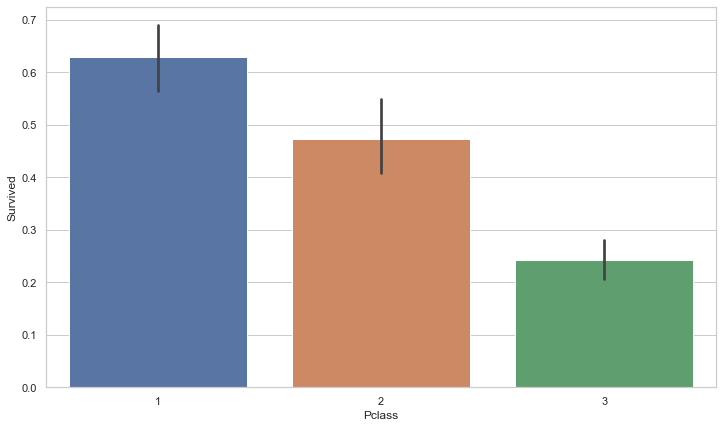

In [202]:
# Basic Barplot
plt.figure(figsize=(12, 7))
sns.barplot(x='Pclass', y='Survived', data=data)

In [218]:
# Advanced barplot (using plotly go) (Important)
y = []
fare = []
for i in list(data['Pclass'].unique()):
    result = data[data['Pclass'] == i]['Age'].mean()
    fares = data[data['Pclass'] == i]['Fare'].mean()
    y.append(result)
    fare.append(fares)

# import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

# Defining data
trace = go.Bar(x = list(data['Pclass'].unique()), y=y, marker=dict(color=fare,colorscale='Viridis', showscale=True), text=fare)
# data=[trace]
info=[trace]

# Defining layout
layout = go.Layout(title='Age/Fare vs Pclass Bar Chart', xaxis=dict(title='Pclass'), yaxis=dict(title='Age'), hovermode='closest')

# Defining figure and plotting
figure = go.Figure(data=info, layout=layout)
iplot(figure)    

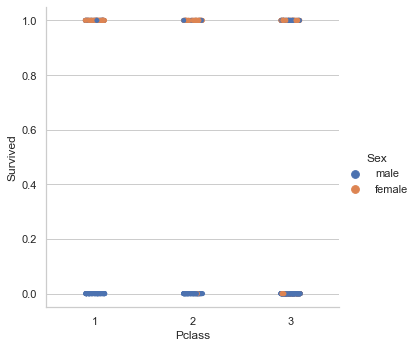

In [217]:
# Basic catplot
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data)

In [216]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [232]:
# Extracting title info from name (Mr, Mrs, Miss etc)
# for col in data[0:1]:
    # print(col)
    # col['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')

# Replacing string values 
# data['Title'] = data['Title'].replace('Mlle', 'Miss')    

In [233]:
# Alternate way of converting category to numeric
# for col in data:
    # col['Sex'] = col['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [247]:
# Getting null values of a column
data[data['Age'].isnull()][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [261]:
# Get random value from nd.array
age_rep_values = [0, 1, 2, 3, 4, 5]
np.random.choice(age_rep_values, size=1)[0]

2

In [270]:
# Locate on condition
data.loc[data['PassengerId'] == 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [288]:
# Locate on index value
data.iloc[19]

PassengerId                         20
Survived                             1
Pclass                               3
Name           Masselmani, Mrs. Fatima
Sex                             female
Age                                NaN
SibSp                                0
Parch                                0
Ticket                            2649
Fare                             7.225
Cabin                              NaN
Embarked                             C
FareBand                (-0.001, 7.91]
Name: 19, dtype: object

In [290]:
data.Ticket.iloc[19]

'2649'

In [274]:
# Creating list based on condition for a column (PassengerID where age is NaN)
nan_age_list_1 = list(data[data['Age'].isnull()]['PassengerId'])

In [275]:
# Getting index values based on condition
nan_age_list_2 = data[data['Age'].isnull()].index.tolist()

In [276]:
# Binning using quantile cut
data['FareBand'] = pd.qcut(data['Fare'], 4)

In [293]:
# Using loc to assign value based on condition
# data.loc[data['FamilySize'] == 0, 'IsAlone'] = 1

In [ ]:
# Getting no. of combinations for Grid/Random search
# num_combinations = 1
# for n in param_grid.values(): num_combinations *= len(n) 
# print(num_combinations)

In [295]:
# Convert string to code 
# eval(data['model'][0])

In [303]:
int(data.loc[data.Pclass == 2].Age.mean())

29

In [304]:
# Simple logic for imputing values (Important)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

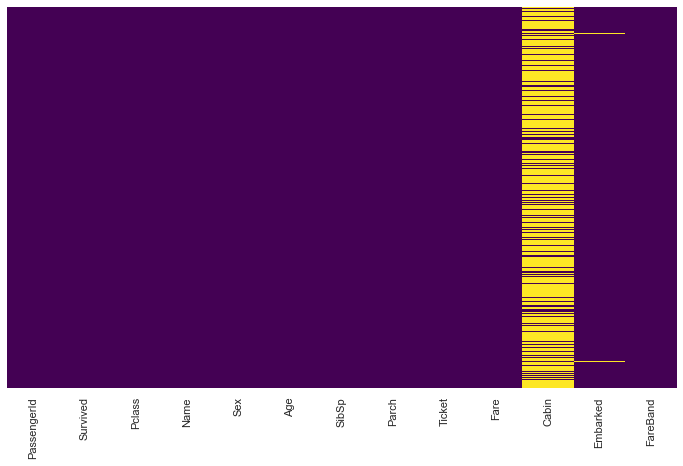

In [307]:
# Simple heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [308]:
# Converting categorical variables to numerical (using get_dummies and avoiding dummy variable trap)
pd.get_dummies(data['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
# Basic Logistic regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# logmodel = LogisticRegression(max_iter=420)
# logmodel.fit(X_train, y_train)

# predictions = logmodel.predict(X_test)
# predictions

# accuracy = confusion_matrix(y_test, predictions)
# accuracy

# print(classification_report(y_test, predictions))

In [ ]:
# Getting percent of rows on a condition
sum(data['LiteracyRate'] == 0.0)/(data.shape[0])*100

In [ ]:
# Getting percent of rows on a condition for whole DF
(data[data == 0.0].count()/data.shape[0])*100

In [ ]:
# Getting row indexes on condition and total 
data[data['Region'] == eru].index

len(data[data['Region'] == eru].index)

In [ ]:
# Getting common row indexes of multiple columns (Can add more than two *Important)
data[(data['FertilityRate'] == 0.0) & (data['Region'] == eru)].index

In [ ]:
# Getting zscore
from scipy import stats
stats.zscore(data['Population'])[0:5]

In [ ]:
# Getting index value based on condition (abs removes -ve sign, like mod in math)
data[np.abs(stats.zscore(data['Population'])) > 3].index

In [ ]:
# Getting largest and smallest n number of values from a column
data.nlargest(5, ['FertilityRate'])
data.nsmallest(5, ['LiteracyRate'])

In [ ]:
# Basic scatter plot
plt.scatter(data['Under15'].index, data['Under15'])

In [ ]:
# Basic zscore with condition
data[stats.zscore(data['GNI']) > 4]

In [ ]:
# Sort list alphabetically
sorted(data.Region.unique())

In [ ]:
# Operate on instance and label encode multiple cols (isinstance checks for condition and returns bool value. *Important)
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
        data[i] = encoder.fit_transform(data[i])

In [ ]:
# Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

X_vif = add_constant(X)

pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)

import scipy.stats as stats 
stats.f_oneway(X['Region'], y)

In [ ]:
# Alternate way for checking correlation
np.corrcoef(X['FertilityRate'], y)[0, 1]

In [ ]:
# Checking correlation w.r.t all columns
correlation = pd.Series([(np.corrcoef(X[i], y)[0,1]) for i in columns], index = columns)
correlation

In [ ]:
# Line graph for checking the difference of result between predicted and actual (*Important)
import matplotlib.pyplot as plt 
plt.figure(figsize=(16, 8))
plt.plot(testy.reset_index(drop=True), label='Actual', color='g')
plt.plot(lr_model.predict(testX), label='Predicted', color='r')
plt.legend(loc='upper right')

In [309]:
# Decision Trees
# Snippets titanic_self1

# Using colors for plots
# import seaborn as sns
import sys
sns.set(style='dark') # White background style for seaborn plots
sns.set(style='darkgrid', color_codes=True)
RED   = '\033[1;31m'  
BLUE  = '\033[1;34m'
CYAN  = '\033[1;36m'
GREEN = '\033[0;32m'

Count of missing values: 0, The Proportion of this values with dataset is 0.000

Visualization AGE


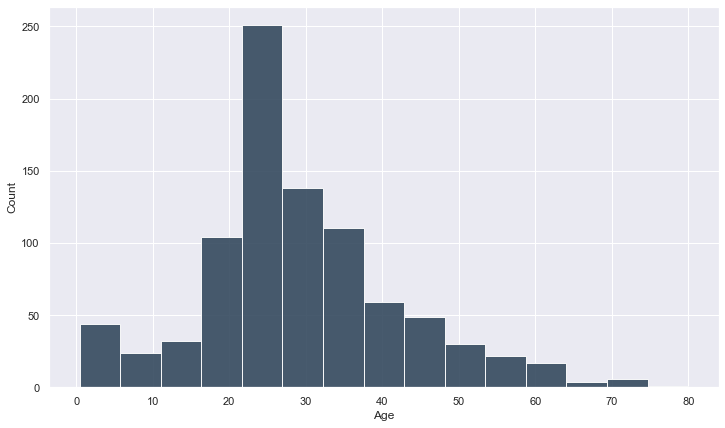

In [311]:
# Getting proportion of missing values
plt.figure(figsize=(12, 7))
a = sum(pd.isna(data.Age)) # Count missing values
b = round(a/(len(data.PassengerId)), 4) # Proportion of 'Age' missing in percent
sys.stdout.write(GREEN)
# print('Count of missing values: {}, The Proportion of this values with dataset is {}\n'.format(a, math.floor(x)(b*100)))
# print('Count of missing values: {}, The Proportion of this values with dataset is {}\n'.format(a, np.floor(b*100))) # Works for decimal too
print('Count of missing values: {}, The Proportion of this values with dataset is {}\n'.format(a, '%.3f' % (b*100))) 
print('Visualization AGE')
ax = data['Age'].hist(bins=15, color='#34495e', alpha=0.9)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

Density Plot of Age for Surviving Population and Deceased Population


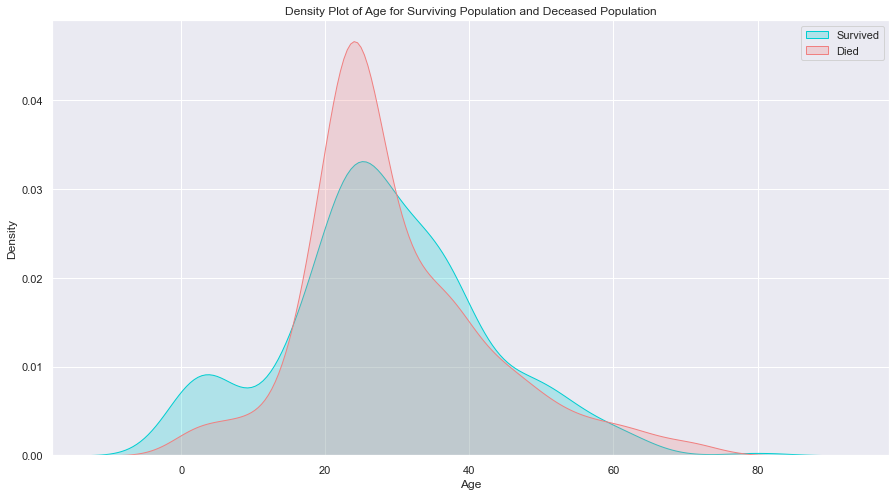

In [312]:
# Single feature density plot
sys.stdout.write(GREEN)
print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(15,8))
sns.kdeplot(data.Age[data.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(data.Age[data.Survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

In [315]:
# Checking for null values 
# data.isnull().any()
# data.isnull().any().any()
data['Cabin'].isnull().sum()

687

In [ ]:
# Basic logit regression using scipy stats (chisquareprob) for stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model = sm.Logit(Y, X)
result=logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

In [ ]:
# Basic ROC/AUC curve visualization
# Visualizing the model's ROC curve 
from sklearn.metrics import roc_curve, auc
# logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC
sys.stdout.write(GREEN)
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Basic Decision tree
from sklearn import tree
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_leaf=20)

cols=['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor'] 

X_DT = df_final[cols]
Y_DT = df_final['Survived']

tree1.fit(X_DT, Y_DT)

# Print tree (text only)
print(tree.export_text(clf))

# Plot tree structure
plt.figure(figsize=(15, 15))
tree.plot_tree(tree1, filled=True)

# Plotting tree structure using graphviz (Important)
import graphviz

tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names=X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

In [ ]:
# Basic Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X_DT = df_final[cols]
Y_DT = df_final['Survived']

tree1.fit(X_DT, Y_DT)

cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor'] 
X = df_final[cols]
Y = df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
sys.stdout.write(GREEN)
print ('ROC AUC: %0.3f' % random_forest.score(X, Y))

# Predicting results
final_test_RF = test[cols]
final_Y = test['Survived']
Y_pred_RF = random_forest.predict(final_test_RF)

sys.stdout.write(GREEN)
print("Model ROC_AUC : {:.2f}%".format(roc_auc_score(final_Y, Y_pred_RF)))

In [ ]:
# Snippets *Multi_Models (Checkout for good example of PCA)

# Basic KNN
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
# x, y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']

knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ', round(knn.score(x_test, y_test)*100, 3))

In [ ]:
# KNN with a line graph to compare result with different values of K (*Important)

neig = np.arange(1, 25) # Total no. of neighbours to try
train_accuracy = []
test_accuracy = []

# Looping on different values of K to get best result

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_accuracy.append(round(knn.score(x_train, y_train)*100, 3))
    test_accuracy.append(round(knn.score(x_test, y_test)*100, 3))

# Plot Graph

plt.figure(figsize=[30, 12])
plt.plot(neig, test_accuracy, label = 'Test Accuracy')
plt.plot(neig, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph_knn.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

In [ ]:
# Basic 3D scatter plot
import plotly.express as px

fig = px.scatter_3d(x_pc3_df, x='PC1', y='PC2', z='PC3', color=target)
fig.show()

In [ ]:
# Linear Regression model (Nice)
from sklearn.linear_model import LinearRegression

# Creating data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable.

data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1, 1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1, 1)

reg = LinearRegression()

# Predict Space
predict_space = np.linspace(min(x), max(x)).reshape(-1, 1)

# Fit
reg.fit(x, y)

# Predict
predicted = reg.predict(predict_space)

# R^2
print('R^2 score: ', reg.score(x, y))

# Plotting Regression Line
plt.figure(figsize=(15,15))
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [ ]:
# Basic cross validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x, y, cv=k)
print('CV Scores: ', cv_result)
print('CV Scores Avg: ', np.sum(cv_result)/k)

In [ ]:
# Basic lasso regression
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
# ridge_predict = lasso.predict(x_test)
print('Lasso score: ', lasso.score(x_test,y_test))
print('Lasso coefficients: ', lasso.coef_)

In [ ]:
# Basic Ridge regression
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge Score: ', ridge.score(x_test, y_test))

In [ ]:
# Cross validation in ridge
from sklearn.linear_model import RidgeCV
r_alphas = np.logspace(0, 5, 100) # initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')# fit the model with the best alpha
ridge_model = ridge_model.fit(x_train, y_train)
print('Alpha Value: ', ridge_model.alpha_)
print('Ridge Score: ', ridge_model.score(x_test, y_test))

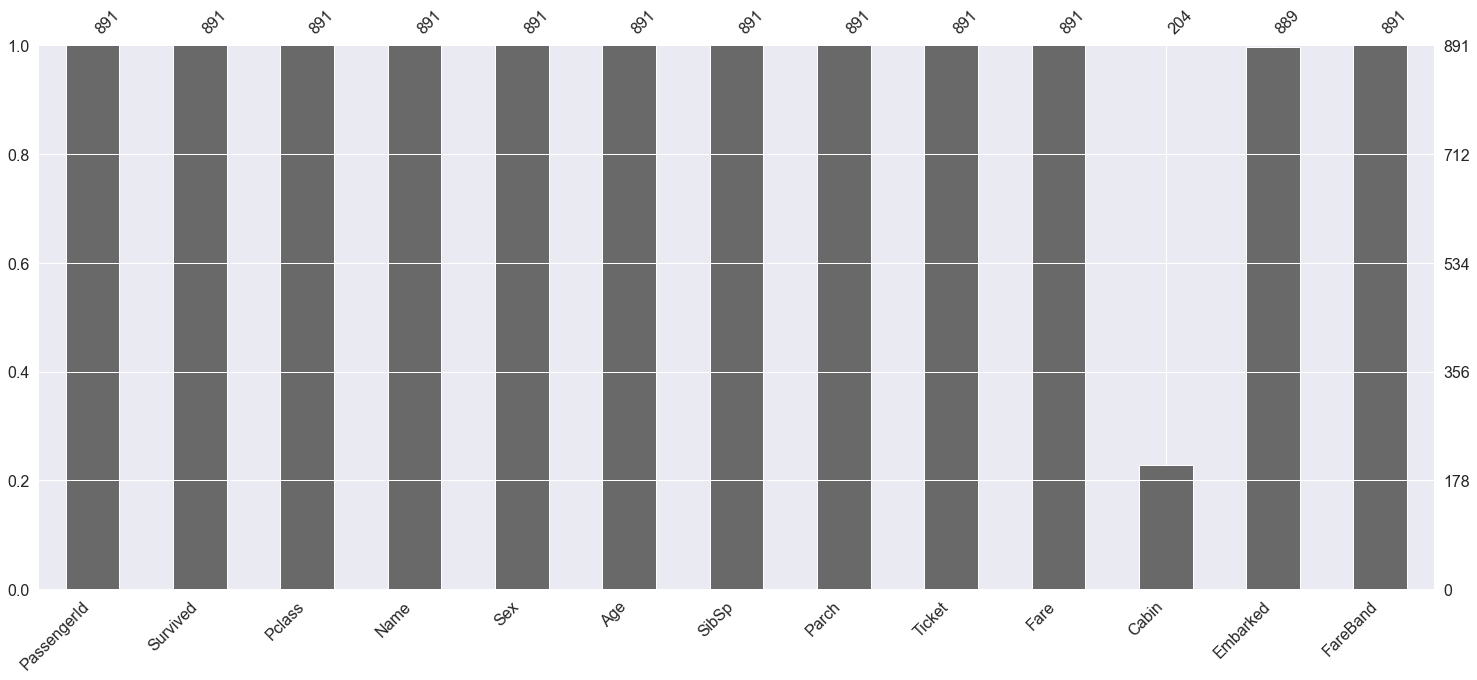

In [316]:
# Plot number of null values
import missingno as msno
p = msno.bar(data)

In [ ]:
# Replacing zeros win nan for each column
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns] = df[columns].replace(0, np.nan)

In [ ]:
# Getting binary category count and plotting on bar graph.
print(df.Outcome.value_counts())
p3 = df.Outcome.value_counts().plot(kind='bar')

In [317]:
# Basic iloc operation (Rows, Columns)
data.iloc[0:5, 0:3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [ ]:
# Some cool loc operations
len(df.loc[df.BMI == 32.0])

len(df.Age.loc[df.Outcome == 0])

df.Age.loc[df.Outcome == 1].mode()

df.loc[df.index[3], 'Name'] = np.nan

len(df.loc[df.BMI == 32.0].loc[df.Outcome == 0]) #Important

In [321]:
# A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values (Important)
from collections import Counter

myList = [1,1,2,3,4,5,3,2,3,4,2,1,2,3]
print(Counter(myList))

print(Counter(myList).items())

print(Counter(myList).keys())
 
print(Counter(myList).values())

Counter({2: 4, 3: 4, 1: 3, 4: 2, 5: 1})
dict_items([(1, 3), (2, 4), (3, 4), (4, 2), (5, 1)])
dict_keys([1, 2, 3, 4, 5])
dict_values([3, 4, 4, 2, 1])


In [ ]:
# Getting count on a column with condition
df.Age.loc[df.Outcome == 1]

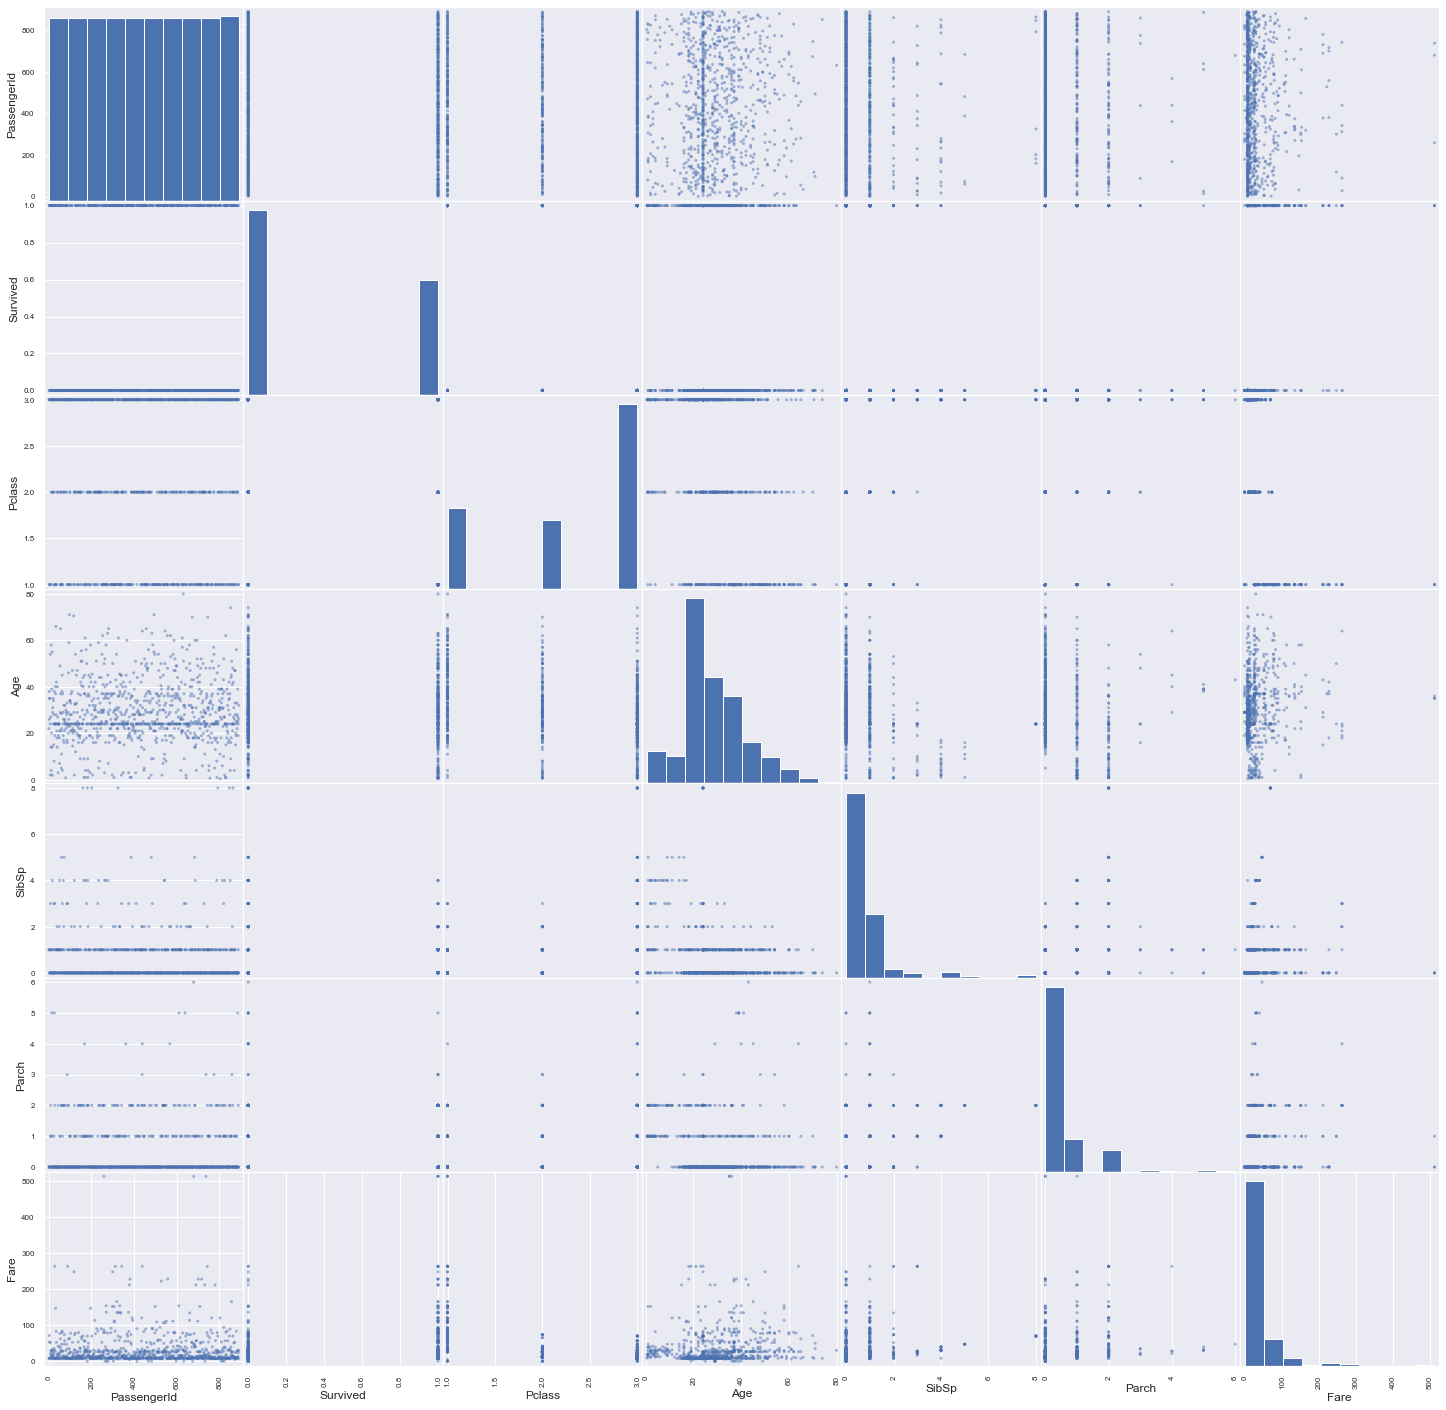

In [322]:
# Basic scatter matrix
from pandas.plotting import scatter_matrix
p4 = scatter_matrix(data, figsize=(25, 25))

In [325]:
# Plotting count of datatypes in a df
sns.countplot(y=data.dtypes, data=data)
plt.xlabel('Count of each dtype')
plt.ylabel('Dtypes')
plt.show()

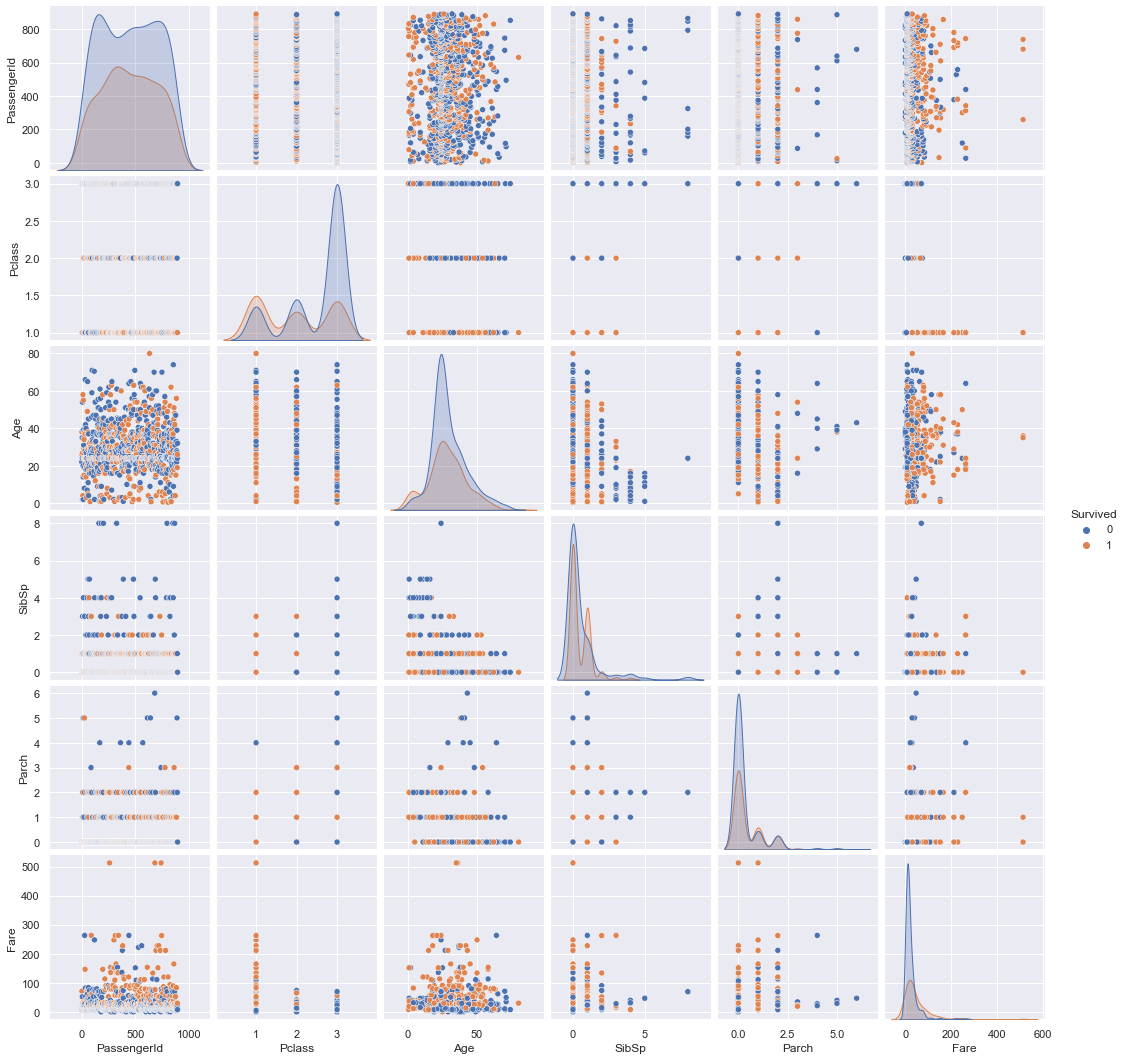

In [327]:
# Basic pairplot
sns.pairplot(data, hue = 'Survived')

In [ ]:
# Use <br> in markdown cell for new line.

In [ ]:
# Looping through a range of values for K in KNN
errors = []
error_rate = []
test_scores = []
train_scores = []

for i in range(1, 15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    errors.append(pred_i != y_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
# Plot for error rate vs kvalue
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Line plot to compare train and test scores
plt.figure(figsize = (12, 5))
p = sns.lineplot(range(1, 15), train_scores, markers='*', label='Train Score')
p = sns.lineplot(range(1, 15), test_scores, markers='0', label='Test Score')

In [ ]:
# String formatting
# app.config['SQLALCHEMY_DATABASE_URI'] = f'sqlite:///{DB_NAME}' # Inside {} can be python code but is evaluated as string
# plt.title('Binary classification (k = %i, Weights: %s)' % (n_neighbors, weights))
# print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))
# print('Median: {} and Mean: {} | Median age is {} as compared to mean which is ~{}'.format(m1, '%.3f' % (m2), m1, np.ceil(m2)))
# print("UPDATE library SET firstname='{}', lastname='{}' WHERE prnno='{}'".format(self.firstname_var.get(), self.lastname_var.get(), self.prnno_var.get())) # Passes string var in '' quotes

In [ ]:
# Enumerate example
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]

In [ ]:
# Solve mlxtend plot issue
# Plotting Decision boundary
import mlxtend
from mlxtend.plotting import plot_decision_regions

value = 2000000
width = 2000000

plot_decision_regions(
    X.values, y.values, clf=knn, legend=2,
    filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
    filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
    X_highlight=X_test.values 
)

# Adding axes annotations
# plt.figure(figsize=(10,5))
plt.title('KNN with Diabetes Data')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

In [ ]:
# Basic confusion matrix with crosstab
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Confusion matrix with plot
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Basic classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

In [ ]:
# Basic ROC curve with AOC value in legend
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [ ]:
# ROC-AUC curve
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
# Use ravel() to flatten a multidimensional list (array)
# Density plot (Important)
from pylab import rcParams # Alternate method to set figure size
def plot_densities(data):
    '''
    Plot features densities' depending on the outcome values
    '''

    # Change fig size to fit all subplots  
    rcParams['figure.figsize'] = 25, 20

    # Separate data based on outcome values 
    outcome_0 = data[data['Outcome'] == 0]
    outcome_1 = data[data['Outcome'] == 1]

    # Initilize figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1', fontweight='bold')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # Plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        # plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()

In [ ]:
# Load your data 
names = list(df.columns)

# Plot correlation & densities
plot_densities(df)

In [ ]:
# SVM

# Snippets *SVM_and_PCM

# String formatting to print colon '' and execute code (Important)
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")



# String formatting to print 2 decimal places in float
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")



# Basic pipeline initializer
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

In [ ]:
# Printing analysis (Converting classification_report to df prints better result *Important)
pred = clf.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print('Train Result:\n================================================')
print(f'Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%')
print('_______________________________________________')
print(f'CLASSIFICATION REPORT: \n{clf_report}')
print('_______________________________________________')
print(f'Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n')

In [ ]:
# SVC Gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = { 'C' : [0.01, 0.1, 0.5, 1, 10, 100],
               'gamma' : [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
               'kernel' : ['rbf', 'poly', 'linear']}

# param_grid = [
#             { 'C' : [0.01, 0.1, 0.5, 1, 10, 100], 'kernel' : ['linear']},
#             { 'C' : [0.01, 0.1, 0.5, 1, 10, 100], 'kernel' : ['rbf'], 'gamma' : [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001]}]

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best Params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, True)
print_score(svm_clf, X_train, y_train, X_test, y_test, False)

In [ ]:
# Unsupervised Learning 
Snippets *driver_self (Checkout for KMeans)

# Direct scatter plot from values
f1 = data['mean_dist_day'].values
f2 = data['mean_over_speed_perc'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Mean Dist/Day')
plt.ylabel('Mean Overspeed %')

In [ ]:
# Power transformer
pt = PowerTransformer()
new_data = pd.DataFrame(pt.fit_transform(data_test))
new_data.columns = data_test.columns
new_data.head()

In [ ]:
Snippets *India_Covid19_Report (Checkout for good eda and plots)

# Get all data types in the data frame 
Covid_Testing.dtypes

In [ ]:
# Create index
india_cases.index = india_cases['State/UnionTerritory']

In [ ]:
# Get sum of all rows of numerical columns
india_cases.sum()

In [ ]:
# Convert series to df using transpose and color the columns
df = pd.DataFrame(pd.to_numeric(india_cases.sum())).transpose()
df.style.background_gradient(cmap='BuGn', axis=1)

In [ ]:
# GroupBy sample
Test = Covid_Summary.groupby(['State/UnionTerritory'])['Deaths', 'Cured'].sum().reset_index()

In [ ]:
# Incremental go plot (noice)
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = Trend.Date, y = Trend.Cured, name='Recovered'))
fig.add_trace(go.Bar(x = Trend.Date, y = Trend.Deaths, name='Deaths'))
fig.add_trace(go.Bar(x = Trend.Date, y = Trend.Confirmed, name='Confirmed'))

fig.update_layout(barmode='stack', legend_orientation='h', legend=dict(x = 0.3, y = 1.1), paper_bgcolor='white', plot_bgcolor='white')
fig.show()

In [ ]:
# Horizontal bar chart
import plotly.express as px
def horizontal_bar_chart(df, x, y, title, x_label, y_label, color):
    fig = px.bar(df, x = x, y = y, orientation = 'h', title = title, labels = {x.name: x_label, y.name: y_label}, color_discrete_sequence=[color])
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

top_10_death_states = india_cases.sort_values('Deaths', ascending = False)[:10]
horizontal_bar_chart(top_10_death_states, top_10_death_states.Deaths, top_10_death_states.index, 'Top 10 States with most deaths', 'Number of deaths(In Thousands)', 'State Name', 'Orange')


In [ ]:
# Line chart w.r.t date column
Maharashtra = vaccination[vaccination['State']=='Maharashtra']
fig = px.line(Maharashtra, x = 'Date', y = 'Total Vaccinations', title='Vaccination till date in Maharashtra')
fig.update_xaxes(rangeslider_visible = True)

In [ ]:
# Snippets *netflix_report

# Find a specific row using a column value
netflix_overall[netflix_overall['title'] == 'Dinner for Five']

In [ ]:
# To create a new df of single category
netflix_shows = netflix_overall[netflix_overall['type']=='TV Show']

In [ ]:
# Getting mean of null values in df 
null_mean = netflix_overall.isnull().mean()*100
null_mean

In [ ]:
# Using split and lstrip on date to get year and month
netflix_date['Year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['Month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [ ]:
# Store in reverse order 
month_order = ['July', 'August', 'September', 'October', 'November', 'December'][::-1]
# o/p: ['December', 'November', 'October', 'September', 'August', 'July']

In [ ]:
# Group by using unstack() and transpose (Unstack switches rows to columns)
df = netflix_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T

In [ ]:
# Sorting df by a column
netflix_date.sort_values(by=['Year'])

In [ ]:
# Getting % of rows where value == 0.0
(data[data == 0.0].count()/194)*100

In [ ]:
# Getting count of total number of rows on single condition
len(netflix_shows.loc[(netflix_shows['release_year'] == 2013)])

In [ ]:
# Getting count of total number of rows on multiple conditions
len(netflix_date.loc[(netflix_date['Year'] == '2016') & (netflix_date['Month'] == 'December')])

In [ ]:
# Unique heatmap to show data w.r.t number of shows released in different months over the years
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='pink', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In [ ]:
# Basic countplot on categories 
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(data=netflix_movies, x='rating', palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])

In [ ]:
# Inner join of two different df's (Check for detailed explanation)
joint_data = ratings.merge(netflix_overall, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

In [ ]:
# Unique Sunburst plot for top ten shows/movies 
top_rated = joint_data[0:10]
fig = px.sunburst(
    top_rated, 
    path = ['Title', 'country'],
    values = 'Rating',
    color = 'Rating')
fig.show()

In [ ]:
# Getting countries with highest content as a df
country_count = joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
top_countries = country_count[0:11]
top_countries

In [ ]:
# Unique funnel plot
data = dict(
    number=[705,688,58,50,45,35,34,26,21,20],
    country=['United States', 'India', 'United Kingdom', 'Philippines', 'Canada', 'Indonesia', 'Spain', 'Nigeria', 'France', 'Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

In [ ]:
# Countplot for year wise analysis
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

In [ ]:
# Simple kde plot 
plt.figure(figsize=(25, 10))
sns.set(style='darkgrid')
sns.kdeplot(data = netflix_movies['duration'], shade = True)

In [ ]:
# Lollipop plot of Genres vs their count on Netflix.
g = {k: v for k, v in sorted(g.items(), key = lambda item: item[1], reverse = True)}

fig, ax = plt.subplots()
fig = plt.figure(figsize = (20, 10))
x = list(g.keys())
y = list(g.values())
ax.vlines(x, ymin = 0, ymax = y, color = 'green')
ax.plot(x, y, '*', color = 'maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel('Count of Movies')
# Set a Title
ax.set_title('Genres')

In [ ]:
# Scrollable table plot 
fig = go.Figure(data = [go.Table(
    header = dict(values = ['Title', 'Release Year'], fill_color = 'paleturquoise'), 
    cells = dict(values = [oldest_us_series['title'], oldest_us_series['release_year']], fill_color = 'pink'))]
)
fig.show()

In [ ]:
# Colorful treemap
netflix_fr = netflix_overall[netflix_overall['country']=='France']
cleaned_df_fr = netflix_fr.dropna()

fig = px.treemap(cleaned_df_fr, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

In [ ]:
# *Snippets house_prices_git.ipynb

# To get only specific columns from a dataframe (Useful when there are too many columns)
train.loc[:, ['Id', 'LotArea', 'Alley']].head()

train.iloc[:, 0:5]
train.iloc[:, 0:5].head(7)

In [ ]:
# Heatmap to check null values of n number of columns
sns.heatmap(train.iloc[:, 0:5].isnull(), yticklabels=False, cmap='plasma')

In [ ]:
# Getting boolean values (isnull?) for n rows (Returns table)
train.isnull()[0:5]

In [ ]:
# Get dynamic table (just like df.head() but with rows and cols and i/p)
train.iloc[0:19, 10:22]

In [ ]:
# Getting total number of columns with null values 
(train.isnull().any() == True).sum()

In [ ]:
# Using categorical column in legend and to color the points
fig = px.scatter(train, x=train.index, y='SalePrice', labels={'x':'Index'}, 
color=train.MSZoning, template='seaborn', 
title='Sale Price distriution ---> MSZoning') 
fig.show()

In [ ]:
# Scatter sub plots (*Important)
plt.figure(figsize=(22, 22))

n = 1
for col_name in np.sort(train.LotConfig.unique()):
# for col_name in np.sort(train.LotConfig):
    
    plt.subplot(3, 2, n)
    plt.xlabel('Index')
    plt.ylabel('SalePrice')
    plt.scatter(x=train[train.LotConfig == col_name].index,
                y=train[train.LotConfig == col_name].SalePrice, color=next(color_cycle))
    plt.title('SalePrice distribution --> '+ col_name +' value of LotConfig')

    n += 1

In [ ]:
# Getting categorical columns on condition
for i in final_df.columns:
    if final_df[i].nunique() == 2:
        print(final_df[i].unique())

In [ ]:
# Lambda function to check if a given vaue is from 10 to 20.
test = lambda x : True if (x > 10 and x < 20) else False
# Check if given numbers are in range using lambda function
print(test(12))

In [ ]:
# One Hot Encoding df and removing encoded parent column in one line ;)
encoded_df = pd.get_dummies(final_df, columns=cat_columns, drop_first=True)

# One Hot Encoding basic example (Creates a separate table)
Destination = pd.get_dummies(train_data[['Destination']], drop_first=True)
Destination.head()

# Label Encoding basic example (Replacing category values with integers)
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [ ]:
# Concatination of dataframes (Airline, Source, Destination are separate dataframes)
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [ ]:
# Getting duplicate columns
dupes = encoded_df.columns.duplicated()

In [ ]:
# Remove duplicate columns 
encoded_df = encoded_df.loc[:, ~encoded_df.columns.duplicated()]

In [ ]:
# Getting columns with null values
test_null_val_ncols = (test.isnull().any() == True).sum()
test_null_val_ncols

test.isnull().sum().sort_values(ascending=False)[0:18]

In [ ]:
# *Snippets gender_recog_git.ipynb

# Get total count of a specific category
len(df_voice.loc[df_voice['label'] == 1])
len(df_voice.loc[df_voice['label'] == 'male'])

In [ ]:
# Using iloc to get specific rows and columns 
df_voice.iloc[4915:4928]
df_voice.iloc[1580:1589, 18:21]

In [ ]:
# To get the classes that are encoded
labelEncoder.classes_

In [ ]:
# To retain df structure and not convert to an nd.array after scaling
# df[:] (use syntax)
df_voice[:] = MinMaxScaler().fit_transform(df_voice)

In [ ]:
# Seaborn kde subplots (important classification graph)
plt.subplots(5, 4, figsize=(25, 30))

for i in range(1, df_voice.shape[1]):
    plt.subplot(5, 4, i)
    # plt.title(df_voice.columns[i-1])
    sns.kdeplot(df_voice.loc[df_voice['label']==0, df_voice.columns[i-1]], color='green', label='F')
    sns.kdeplot(df_voice.loc[df_voice['label']==1, df_voice.columns[i-1]], color='blue', label='M')
    plt.legend()

In [ ]:
# Plotting boxplot for categories directly
plt.figure(dpi=80)
plot_imp.boxplot(by='label', figsize=(25, 10))
plt.show()

In [ ]:
# Pairplot with different labels for categories 
g = sns.pairplot(plot_imp, hue = 'label', size=3, markers=['o', 's'])
g.fig.set_size_inches(25, 15)

In [ ]:
# Standard report generator for all models
def classify(model, x_train, y_train, x_test, y_test):
    target_labels = ['female', 'male']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_labels, digits=4)) #digits: Important


In [ ]:
# Plotting accuracy for different values of k for train and test data
# Model Complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

In [ ]:
# Looping on different values of K to get best result
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_accuracy.append(round(knn.score(x_train, y_train)*100, 3))
    test_accuracy.append(round(knn.score(x_test, y_test)*100, 3))


In [ ]:
# Plot Graph
plt.figure(figsize=[30, 12])
plt.plot(neig, test_accuracy, label = 'Test Accuracy')
plt.plot(neig, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph_pca2.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))


In [ ]:
# KNN def with index values of different error rates
def knn_error(k, x_train, y_train, x_test, y_test):
    
    error_rate = []
    K = range(1, k)

    for i in K:
        knn = knn_classifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(round(np.mean(y_pred != y_test), 4))
    
    k_loc = error_rate.index(min(error_rate))
    print(k_loc)
    print(error_rate)
    print('Lowest error is %s occurs at k = %s.' %(error_rate[k_loc], K[k_loc])) #Important

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    
    return K[k_loc]


In [ ]:
# Getting the outliers that are removed 
temp_df = pd.merge(X, dc_iqr, how='outer', suffixes=('', '_y'), indicator=True)
outliers_df = temp_df[temp_df['_merge']=='left_only'][X.columns]

In [ ]:
# XGB (Regression)

# * Snippets bhp_xgb_kfcv

# Getting row based on condition of a single column (loc operations)
df.loc[df['size'] == '43 Bedroom']

df.loc[df['bath'] == df['bath'].max()]

df.loc[df['total_sqft'] == df.total_sqft.min()]

In [ ]:
# Getting mean based on condition
df.loc[df.bhk == 4].total_sqft.mean()

In [ ]:
# Getting df based on a condtion on column and sorting in ascending order
df.loc[df.bhk == 1].sort_values('total_sqft', axis = 0, ascending = True)

In [ ]:
# Getting value based on condition from a column (returns df, then applying ['col'].min() on it)
df[df.bhk == 1]['total_sqft'].min()

In [ ]:
# Getting row based on index
df.iloc[4044] # Returns series
df.iloc[[4044]] # Returns df

In [ ]:
# Getting index value based on condition
df.loc[df['price_per_sqft'] == 2300000].index[0]

In [ ]:
# Creating a list of features
columns = list(df)
columns.remove('location')

In [ ]:
# Boxplot for outliers (subplots)
f, axes = plt.subplots(2, 3, figsize=(25, 15))

n=0
sns.set(font_scale = 1)
for col_name in columns:
    i, j = divmod(n, 3)
    print(i, j)
    sns.boxplot(x=col_name, data=df, ax=axes[i, j])
    # sns.violinplot(x=col_name, data=df, ax=axes[i, j])
    n += 1

In [ ]:
# To iterate through dataframe columns and rows (returns nd.array)
# for (columnName, columnData) in df.iteritems(): # iteritems() is not recommended for iteration
for column, Data in df.iteritems():
    # print('Column Name : ', columnName)
    print('Column Contents : ', type(Data.values))

In [ ]:
# Vectorised solution: Converting row to numpy array. Results in very fast convergence.
threshold = 3
outliers_idxs = []

for column in columns:
    i_num = 0
    std = np.std(df[column])
    mean = np.mean(df[column])

    for row in df[column].to_numpy():
        i_num += 1
        z_score = (row - mean) / std
        
        if np.abs(z_score) > threshold:
            # print(row, 'index:', i_num-1)
            outliers_idxs.append(i_num - 1)

In [ ]:
# Counting repeated values (Returns dictionary, basically initialized a dict with condition)
# list_cnt = {i: outliers_idxs.count(i) for i in outliers_idxs}

In [ ]:
# To only remove duplicates
t = [1, 2, 1, 2, 8, 7, 3, 6, 5]
list(dict.fromkeys(t))

In [ ]:
# Remove duplicates and get a sorted list
from collections import OrderedDict

t = [1, 2, 1, 2, 8, 7, 3, 6, 5]
list(OrderedDict.fromkeys(t))
o/p
[1, 2, 3, 5, 6, 7, 8]

In [ ]:
# Getting the difference of rows by index between two dfs
ind_diff = df.index.difference(df_clean.index)

In [ ]:
# reset_index ops. Use when some rows are dropped and the label indexes are not concurrent
df.reset_index().loc[[344]]
df.reset_index()['index'].iloc[344]
df.reset_index().loc[df.reset_index()['index'] == 345]
df = df.reset_index().drop(4924)

In [ ]:
# Reset index back to concurrent form. Removes extra index column
df.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate two lists
outliers_idxs.extend(list(rk_indexes))

In [ ]:
# Returns dataframe based on condition (only numerical columns)
df.std(numeric_only=True)

df[~((df.select_dtypes(include=np.number) > upper_bound))] #~ is a bitwise not. Inverting True to False and vise versa.

In [ ]:
# Align [Check later]
df, dc_iqr = df.align(dc_iqr, axis=1, copy=False)

In [ ]:
# *Snippets wholesale_xgb_kfcv.ipynb (Finish this in interview prep)

# Printing boxplots (subplotting)
f, axes = plt.subplots(round(len(columns)/4), 3, figsize=(24, 10))

n = 0
for col_name in columns:
    i, j = divmod(n, 3)
    sns.boxplot(x=col_name, data=data, ax=axes[i, j])
    # sns.violinplot(x=col_name, data=X, ax=axes[i, j])
    n += 1

In [ ]:
# *Snippets chess_self_git.ipynb

# Lambda function
df['white_win'] = df['winner'].apply(lambda x: 1 if x=='white' else 0)